Importing modules

In [1]:
#suppressing a warning - UserWarning: Wswiglal-redir-stdio
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal
import lal as _lal

In [ ]:
import sys

sys.path.insert(0, "../")
from src.regular_precession import *
from src.systems_lib import *
from src.mismatch_n_SNR import *
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams["figure.dpi"] = 200

Defining systems at z = 0.3

In [3]:
# Define the default parameters for the system 1
default_precession_params_sys1 = redshifted_new_params(0.3, default_precession_params_sys1)
default_precession_params_sys1_NP = redshifted_new_params(0.3, default_precession_params_sys1_NP)

# Define the default parameters for the system 2
default_precession_params_sys2 = redshifted_new_params(0.3, default_precession_params_sys2)
default_precession_params_sys2_NP = redshifted_new_params(0.3, default_precession_params_sys2_NP)

# Define the default parameters for the system 3
default_precession_params_sys3 = redshifted_new_params(0.3, default_precession_params_sys3)
default_precession_params_sys3_NP = redshifted_new_params(0.3, default_precession_params_sys3_NP)

Mismatch extremas and at specific gamma_P values

In [4]:
def opt_mismatch_epsilon_NP_min_max(sys):
    lengamma = 501
    if sys == 1:
        rp_params = default_precession_params_sys1
        np_params = default_precession_params_sys1_NP
    elif sys == 2:
        rp_params = default_precession_params_sys2
        np_params = default_precession_params_sys2_NP
    elif sys == 3:
        rp_params = default_precession_params_sys3
        np_params = default_precession_params_sys3_NP
    
    gammaP_arr, mismatch_arr, ind_arr, phase_m_arr = opt_mismatch_gammaP(rp_params, np_params, lengamma)
    
    Epsilon_min = min(mismatch_arr)
    Epsilon_max = max(mismatch_arr)
    
    ind_min = mismatch_arr.index(Epsilon_min)
    ind_max = mismatch_arr.index(Epsilon_max)
    
    gamma_P_min = gammaP_arr[ind_min]
    gamma_P_max = gammaP_arr[ind_max]
    
    Epsilon_0 = mismatch_arr[0]
    Epsilon_pi_2 = mismatch_arr[125]
    Epsilon_pi = mismatch_arr[250]
    Epsilon_3pi_2 = mismatch_arr[375]
    Epsilon_2pi = mismatch_arr[500]
    
    return Epsilon_min, gamma_P_min, Epsilon_max, gamma_P_max, Epsilon_0, Epsilon_pi_2, Epsilon_pi, Epsilon_3pi_2, Epsilon_2pi

Warning: Next cell takes about 1084 seconds or 18 mins 4 secs on 8 (Apple M1 2020) cores 

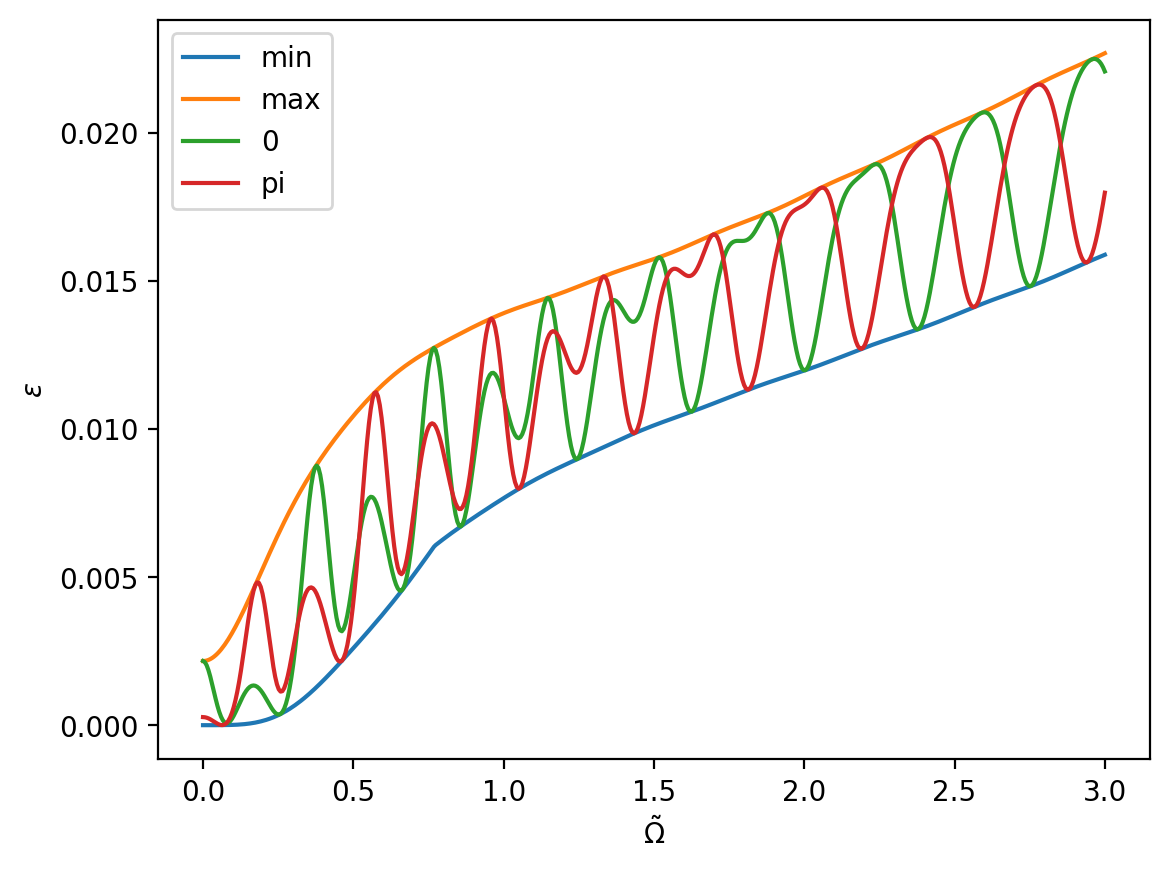

In [5]:

from multiprocessing import Pool

omega_array = np.linspace(0, 3, 501)
default_precession_params_sys2['mcz'] = 10*solar_mass
default_precession_params_sys2_NP['mcz'] = 10*solar_mass

default_precession_params_sys2 = redshifted_new_params(0.3, default_precession_params_sys2)
default_precession_params_sys2_NP = redshifted_new_params(0.3, default_precession_params_sys2_NP)

default_precession_params_sys2['theta_tilde'] = 4

def calculate_epsilon(o):
    default_precession_params_sys2['omega_tilde'] = o
    mismatch_min, g_min, e_max, g_max, e_0, e_pi2, e_pi, e_pi32, e_2pi = opt_mismatch_epsilon_NP_min_max(2)
    return mismatch_min, e_max, e_0, e_pi2, e_pi, e_pi32, e_2pi

if __name__ == '__main__':
    with Pool() as p:
        results = p.map(calculate_epsilon, omega_array)

    ep_array_min_10_4_sys2, ep_array_max_10_4_sys2, ep_array_0_10_4_sys2, ep_array_pi2_10_4_sys2, ep_array_pi_10_4_sys2, ep_array_pi32_10_4_sys2, ep_array_2pi_10_4_sys2 = zip(*results)

    
    plt.plot(omega_array, ep_array_min_10_4_sys2, label = "min")
    plt.plot(omega_array, ep_array_max_10_4_sys2, label = "max")
    plt.plot(omega_array, ep_array_0_10_4_sys2, label = "0")
    plt.plot(omega_array, ep_array_pi2_10_4_sys2, label = "pi")
    plt.xlabel(r'$\tilde{\Omega}$')
    plt.ylabel('$\epsilon$')
    plt.legend()
    plt.show()

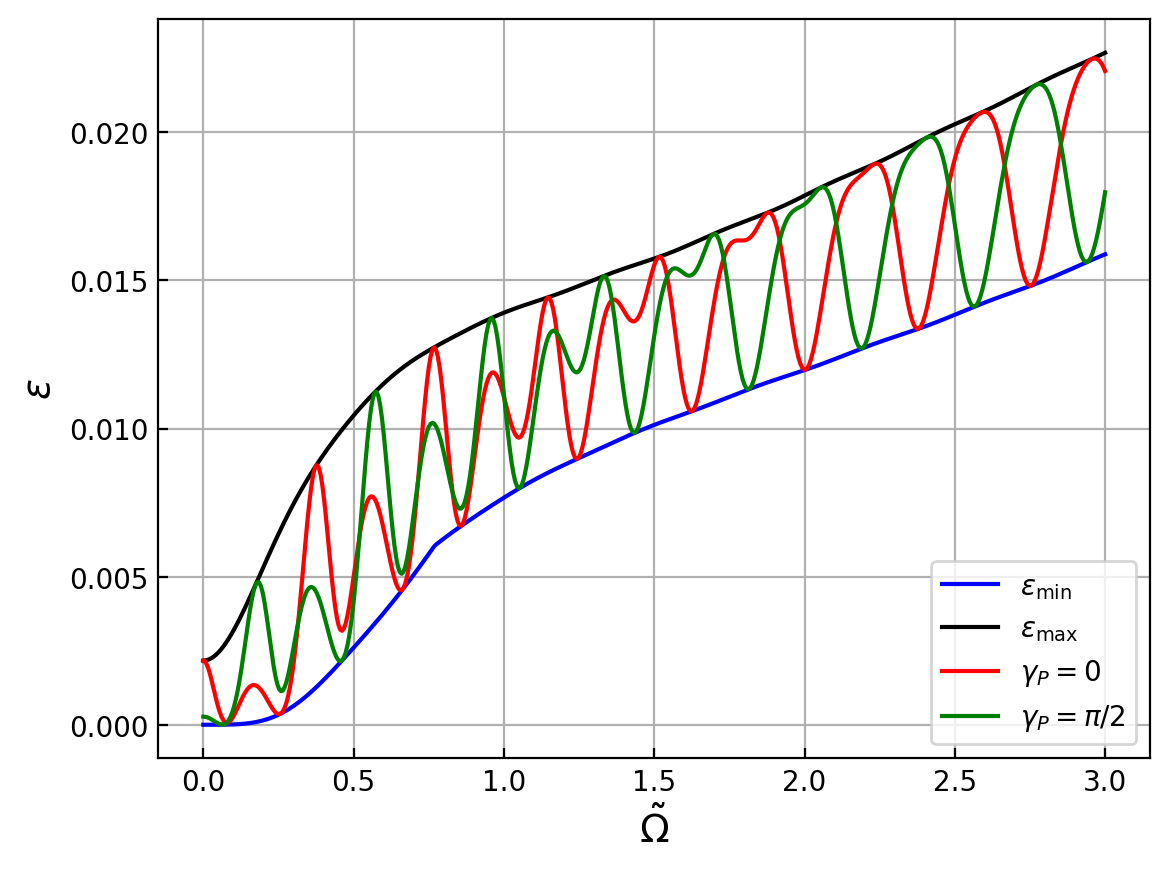

In [6]:
# Plotting the results with legends
plt.plot(omega_array, ep_array_min_10_4_sys2, linestyle = '-', color = 'blue', label = r'$\epsilon_{\rm min}$')
plt.plot(omega_array, ep_array_max_10_4_sys2, linestyle = '-', color = 'black', label = r'$\epsilon_{\rm max}$')
plt.plot(omega_array, ep_array_0_10_4_sys2, linestyle = '-', color = 'red', label = r'$\gamma_P = 0$')
plt.plot(omega_array, ep_array_pi2_10_4_sys2, linestyle = '-', color = 'green', label = r'$\gamma_P = \pi/2$')

plt.xlabel(r'$\tilde{\Omega}$', fontsize = 14)
plt.grid(True)
plt.legend(loc="lower right")
plt.ylabel('$\epsilon$', fontsize = 14)
plt.tick_params(axis='both', which='major', direction='in')

# fig = plt.gcf()
# fig.savefig('mismatch_env_0_pi2.pdf', format='pdf')

In [7]:
def get_1_cycle_omega(rp_param):
    """
    Get omega values required for 1 precession cycle in band
    _________________________
    Returns:
    Omega_value: float : Omega value for 1 cycle
    """
    f_min = 20
    f_cut = Regular_precession(rp_param).get_f_cut()
    total_mass = Regular_precession(rp_param).get_total_mass()
    mcz = rp_param['mcz']
    deno = (total_mass/solar_mass) * (np.pi**(8/3)) * (mcz**(5/3)) * (f_cut**(5/3))
    
    omega = (2 * np.pi / (1/f_min - 1/f_cut)) * deno * (96/5000) 
    
    return omega

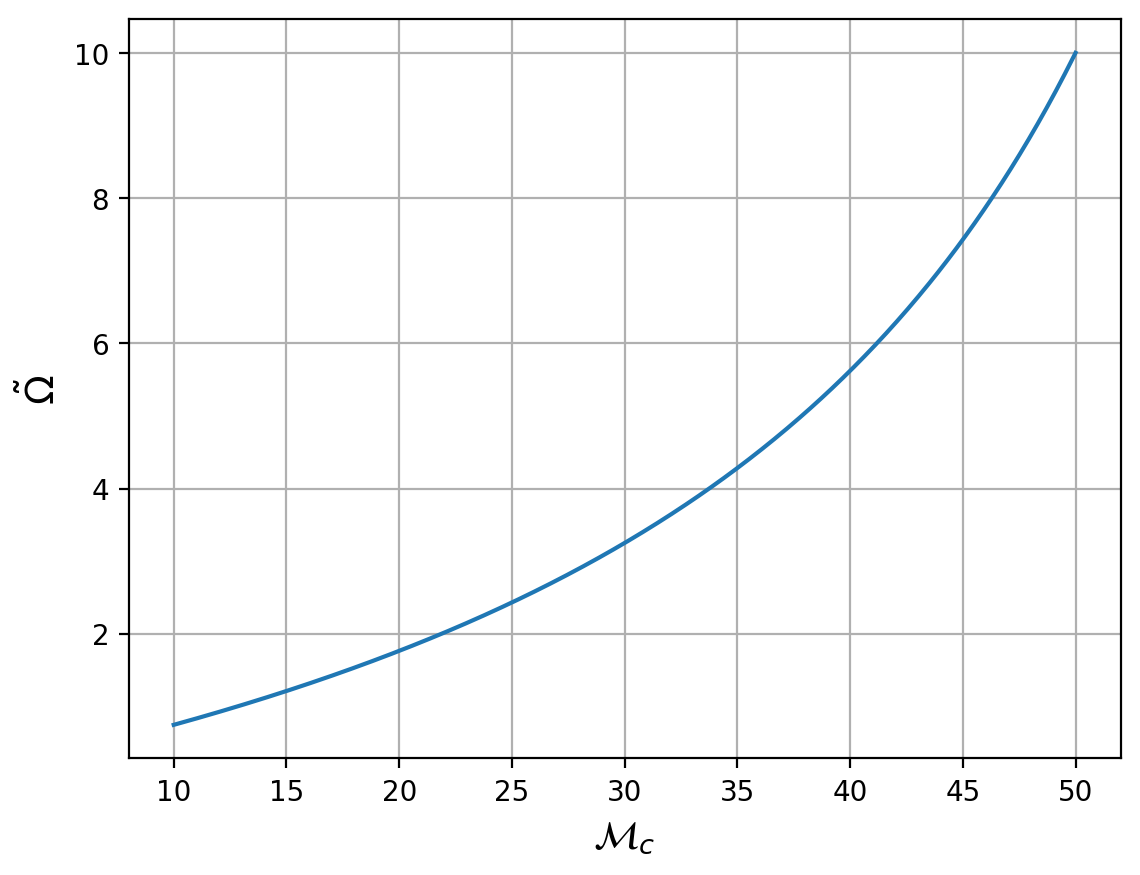

In [8]:
rp_params = default_precession_params_sys2

z = 0.3

mcz_arr = np.linspace(10, 50, 501)

omega_array_N = []

for m in mcz_arr:
    rp_params['mcz'] = m * solar_mass
    rp_params = redshifted_new_params(z, rp_params)
    omega = get_1_cycle_omega(rp_params)
    omega_array_N.append(omega)
    
plt.plot(mcz_arr, omega_array_N)
plt.xlabel(r'$\mathcal{M}_{c}$', fontsize = 14)
plt.ylabel(r'$\tilde{\Omega}$', fontsize = 14)
plt.grid(True)

Final figure

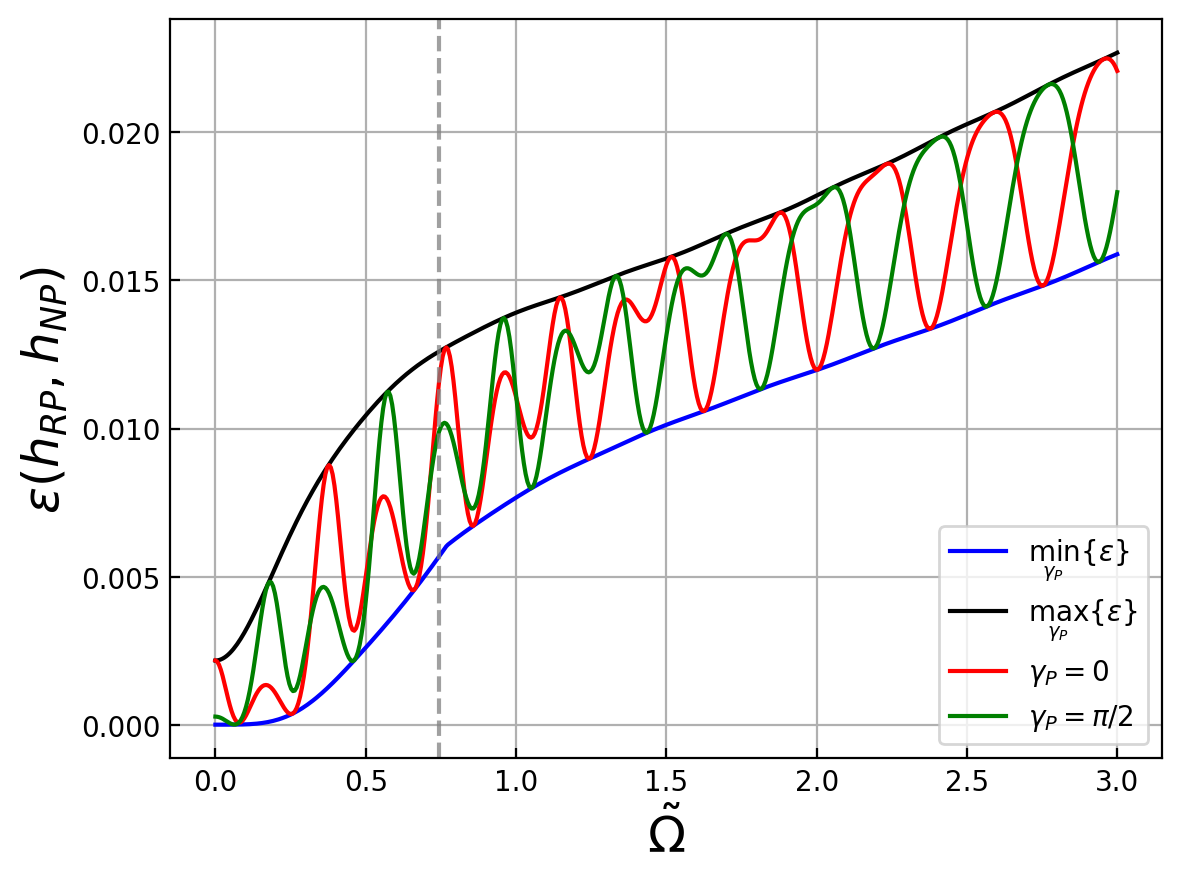

In [ ]:
# Plotting the results
plt.plot(omega_array, ep_array_min_10_4_sys2, linestyle = '-', color = 'blue', label = r'$\min_{\gamma_P} \{\epsilon\}$')
plt.plot(omega_array, ep_array_max_10_4_sys2, linestyle = '-', color = 'black', label = r'$\max_{\gamma_P} \{\epsilon\}$')
plt.plot(omega_array, ep_array_0_10_4_sys2, linestyle = '-', color = 'red', label = r'$\gamma_P = 0$')
plt.plot(omega_array, ep_array_pi2_10_4_sys2, linestyle = '-', color = 'green', label = r'$\gamma_P = \pi/2$')

x1 = omega_array_N[0]
# Add the vertical dashed grey line
plt.axvline(x=x1, color='grey', linestyle='dashed', alpha=0.75)

plt.xlabel(r'$\tilde{\Omega}$', fontsize = 18)
plt.grid()
plt.ylabel('$\epsilon (h_{RP}, h_{NP})$', fontsize = 18)
plt.tick_params(axis='both', which='major', direction='in')

plt.legend(loc="lower right")

fig = plt.gcf()
fig.savefig('figs/mismatch_env_sys2_g_0_g_pi2_n_1cycle.pdf', format='pdf')

In [ ]:
# Plotting the results
plt.plot(omega_array, ep_array_min_10_4_sys2, linestyle = '-', color = 'blue', label = r'$\min_{\gamma_P} \{\epsilon\}$')
plt.plot(omega_array, ep_array_max_10_4_sys2, linestyle = '-', color = 'black', label = r'$\max_{\gamma_P} \{\epsilon\}$')
plt.plot(omega_array, ep_array_0_10_4_sys2, linestyle = '-', color = 'red', label = r'$\gamma_P = 0$')
plt.plot(omega_array, ep_array_pi2_10_4_sys2, linestyle = '-', color = 'green', label = r'$\gamma_P = \pi/2$')

x1 = omega_array_N[0]
# Add the vertical dashed grey line
plt.axvline(x=x1, color='grey', linestyle='dashed', alpha=0.75)

plt.xlabel(r'$\tilde{\Omega}$', fontsize = 18)
plt.grid()
plt.ylabel('$\epsilon (h_{RP}, h_{NP})$', fontsize = 18)
plt.tick_params(axis='both', which='major', direction='in')

plt.legend(loc="lower right")

#fig = plt.gcf()
#fig.savefig('figs/mismatch_env_sys2_g_0_g_pi2_n_1cycle.pdf', format='pdf')

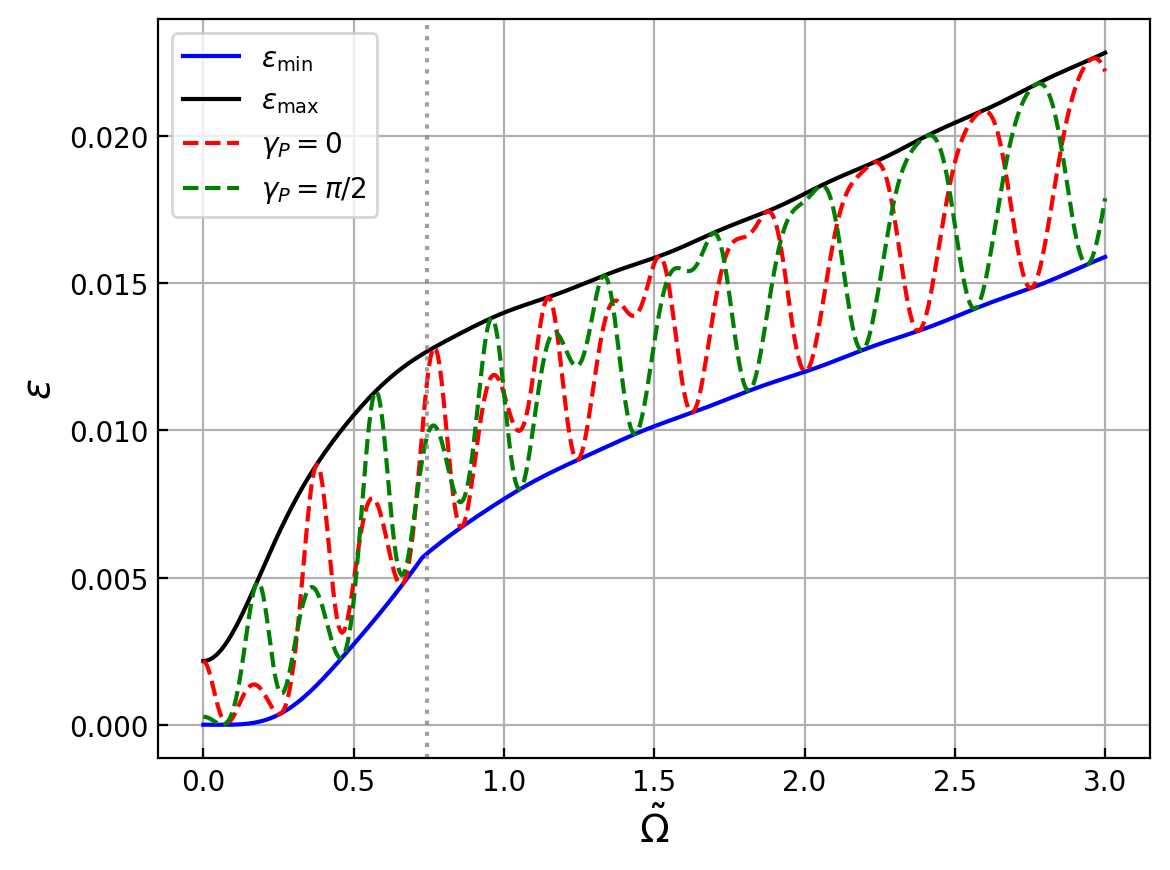

In [10]:
# Plotting the results with legends
plt.plot(omega_array, ep_array_min_10_4_sys2, linestyle = '-', color = 'blue', label = r'$\epsilon_{\rm min}$')
plt.plot(omega_array, ep_array_max_10_4_sys2, linestyle = '-', color = 'black', label = r'$\epsilon_{\rm max}$')
plt.plot(omega_array, ep_array_0_10_4_sys2, linestyle = '--', color = 'red', label = r'$\gamma_P = 0$')
plt.plot(omega_array, ep_array_pi2_10_4_sys2, linestyle = '--', color = 'green', label = r'$\gamma_P = \pi/2$')

x1 = omega_array_N[0]
# Add the vertical dashed grey line
plt.axvline(x=x1, color='grey', linestyle=':', alpha=0.75)

plt.xlabel(r'$\tilde{\Omega}$', fontsize = 14)
plt.grid()
plt.legend()
plt.ylabel('$\epsilon$', fontsize = 14)
plt.tick_params(axis='both', which='major', direction='in')

# Show the plot
plt.show()

# fig = plt.gcf()
# fig.savefig('mismatch_env_0_pi2_1cycle.pdf', format='pdf')